<a href="https://colab.research.google.com/github/mrdbourke/tensorflow-deep-learning/blob/main/00_tensorflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 00 Getting started with TensorFlow: A guide to the fundamentals


## What is Machine Learning?

Machine learning is turning things (data) into numbers and finding patterns in those numbers. Computer does the finding pattern part.

## What is Deep Learning?

Deep learning is a subset of machine learning.

## Traditional Programming vs Machine Learning Algorithm


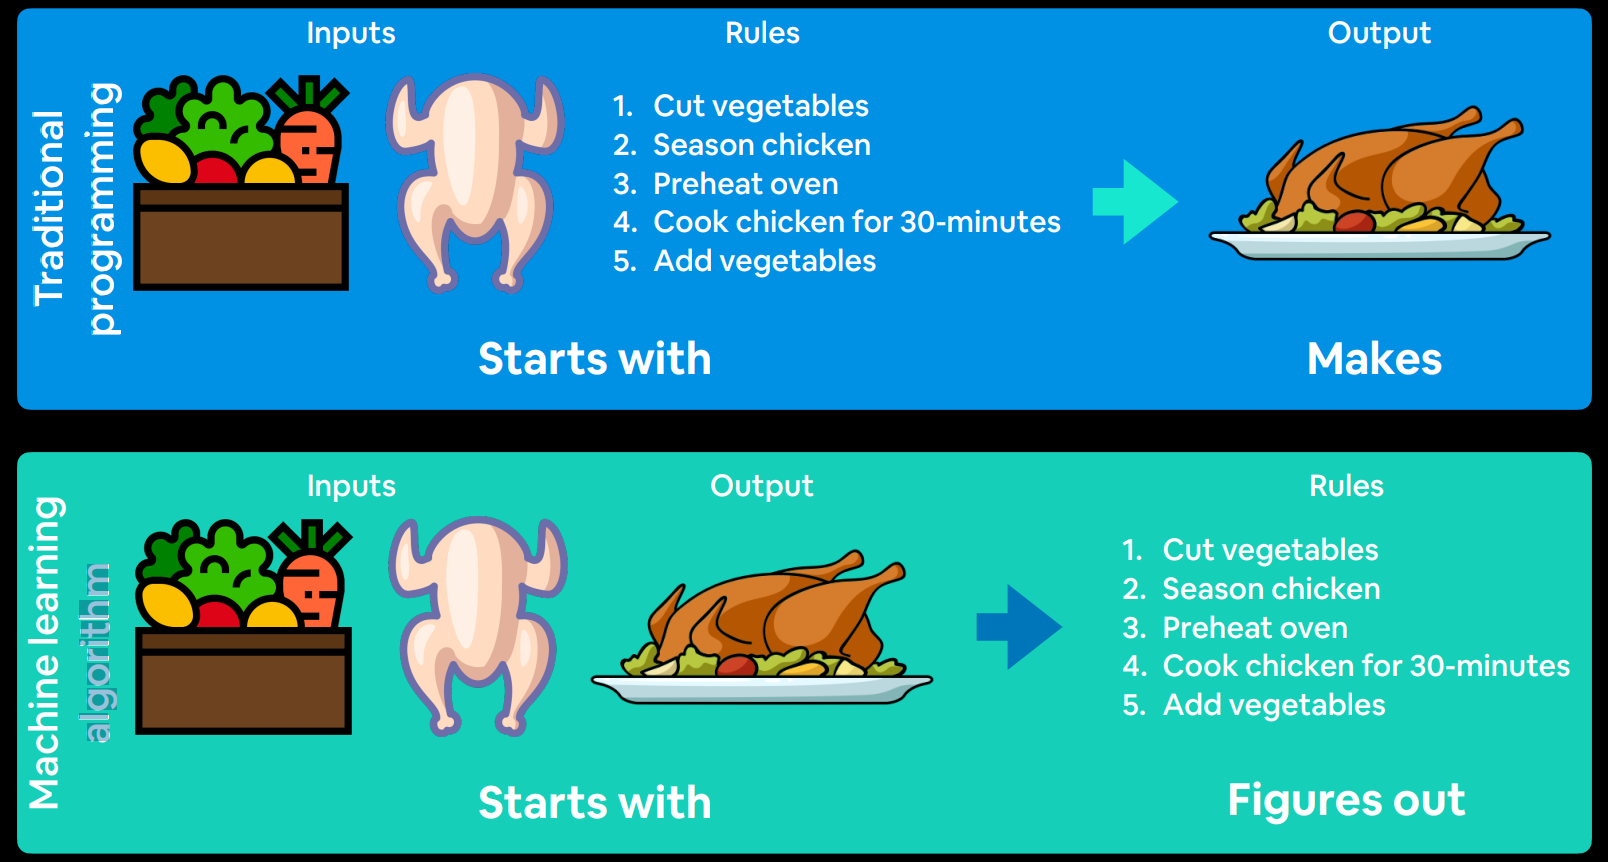


## "Why use machine learning (or deep learning)?"

Good reason? Why not

Better reason: For a complex problem, can you think of all the rules? (probably not)
 
"If you can build a simple rule-based system that doesn’t require machine learning, do that."  — A wise software engineer

## What deep learning is good for?

- Problems with long lists of rules—when the traditional approach fails, machine learning/deep learning may help.
- Continually changing environments—deep learning can adapt (‘learn’) to new scenarios.
- Discovering insights within large collections of data—can you imagine trying to hand-craft rules for what 101 different kinds of food look like


## What deep learning is not good for? (Typically)

- When you need explainability—the patterns learned by a deep learning model are typically uninterpretable by a human.
- When the traditional approach is a better option — if you can accomplish what you need with a simple rule-based system.
- When errors are unacceptable — since the outputs of deep learning model aren’t always predictable.
- When you don’t have much data — deep learning models usually require a fairly large amount of data to produce great results

## Machine Learning vs. Deep Learning

Machine learning good for structured data where deep learning is ideal for unstructured data

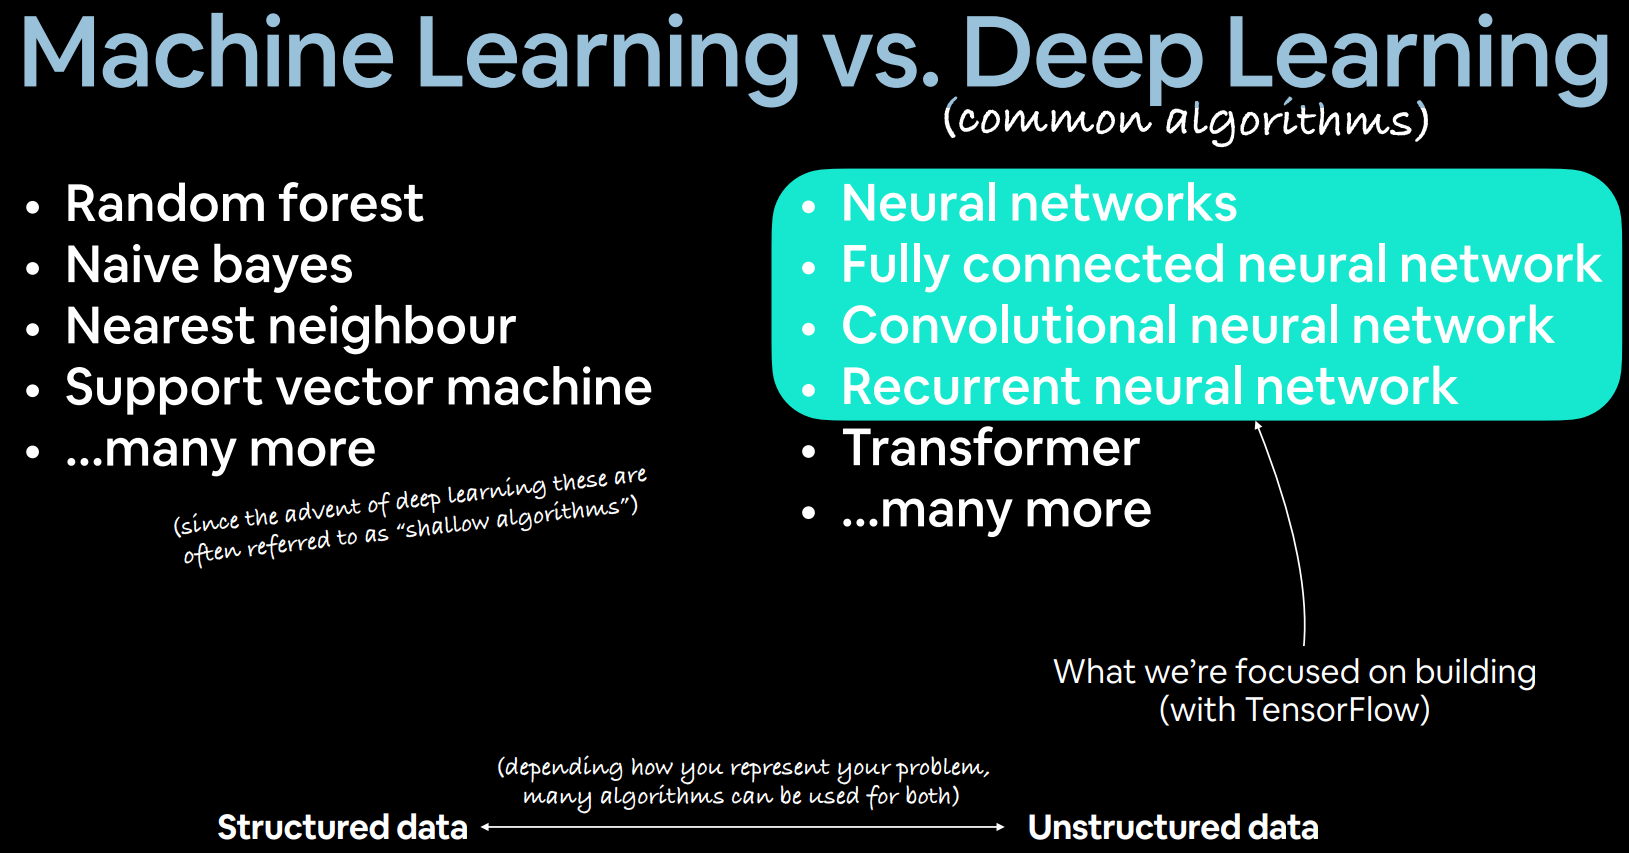


## What are neural networks?



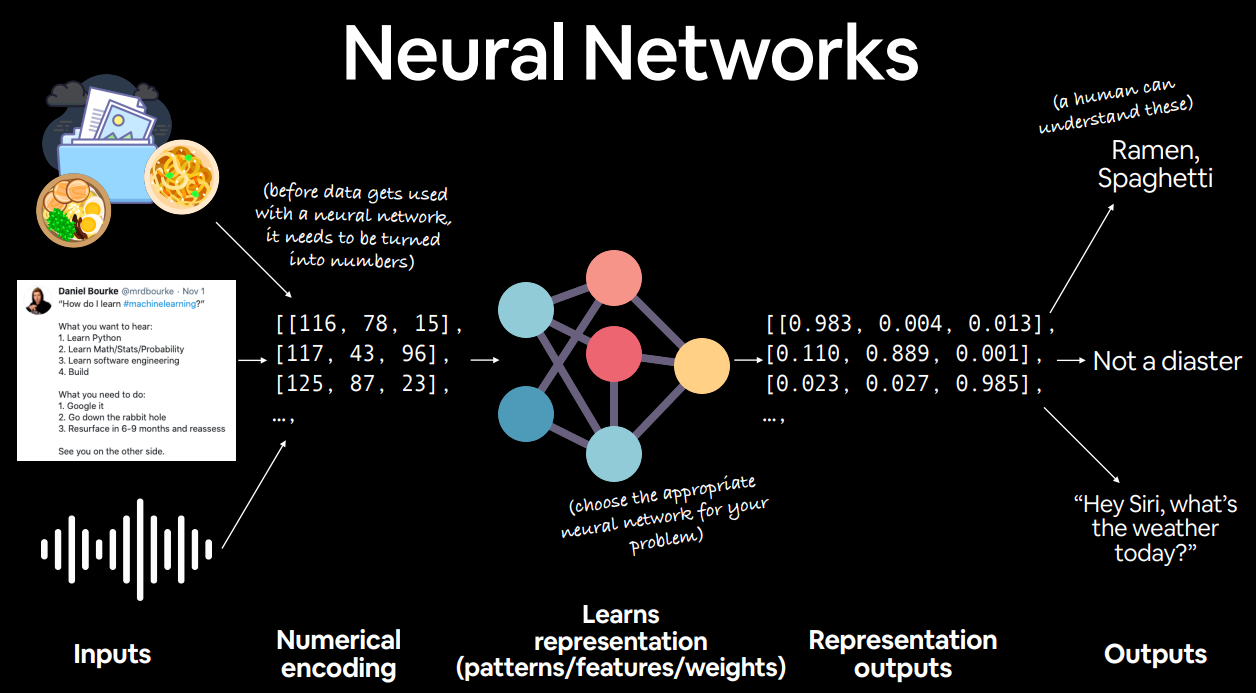

## Anatomy of Neural Networks

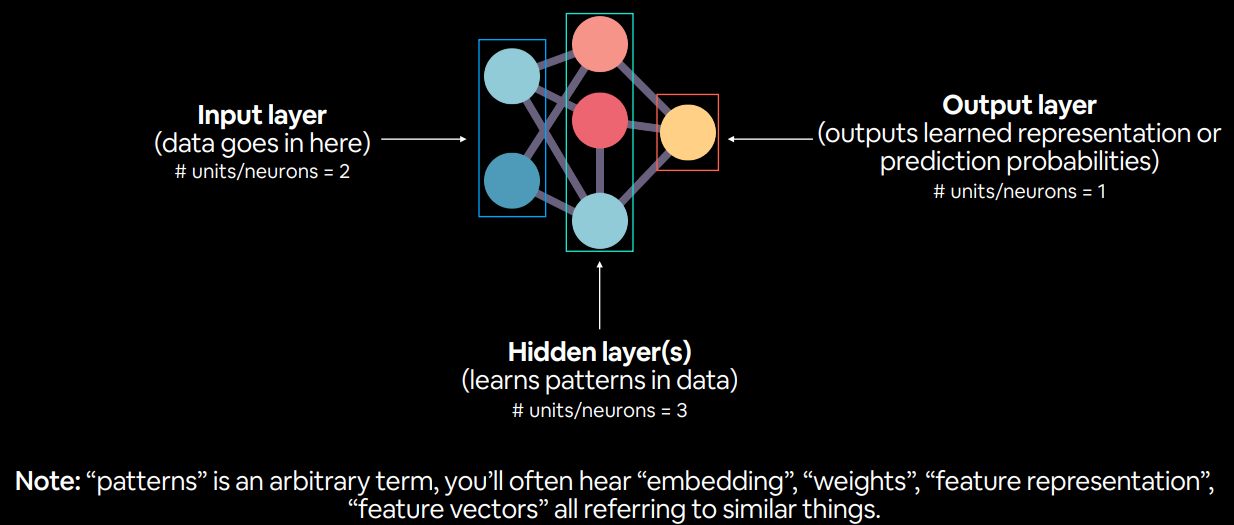

## Types of Learning

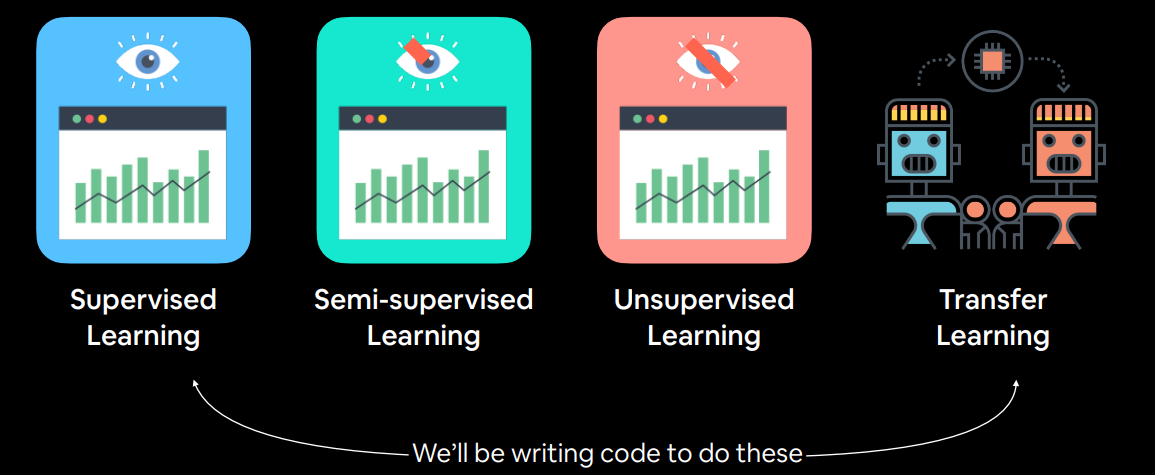

## Deep Learning Use Cases

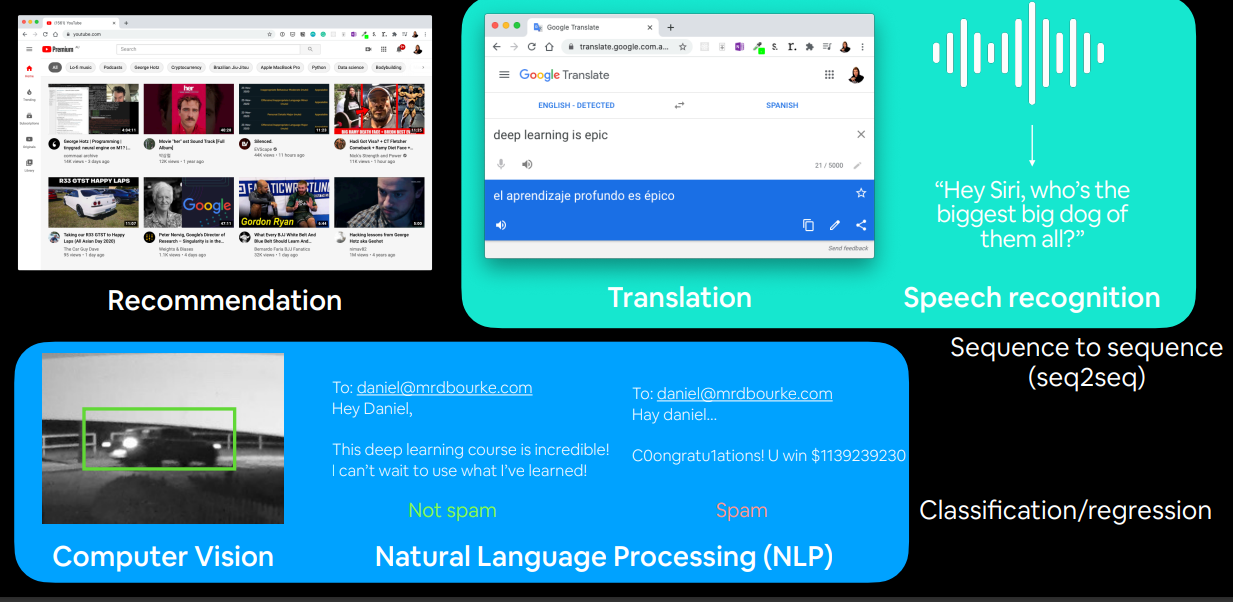

## What is TensorFlow?

[TensorFlow](https://www.tensorflow.org/) is an open-source end-to-end machine learning library for preprocessing data, modelling data and serving models (getting them into the hands of others).

- End-to-end platform for machine learning
- Write fast deep learning code in Python/other accessible languages (able to run on a GPU/TPU)
- Able to access many pre-built deep learning models (TensorFlow Hub) 
- Whole stack: preprocess data, model data, deploy model in your application
- Originally designed and used in-house by Google (now open source)

## Why use TensorFlow?

Rather than building machine learning and deep learning models from scratch, it's more likely you'll use a library such as TensorFlow. This is because it contains many of the most common machine learning functions you'll want to use.


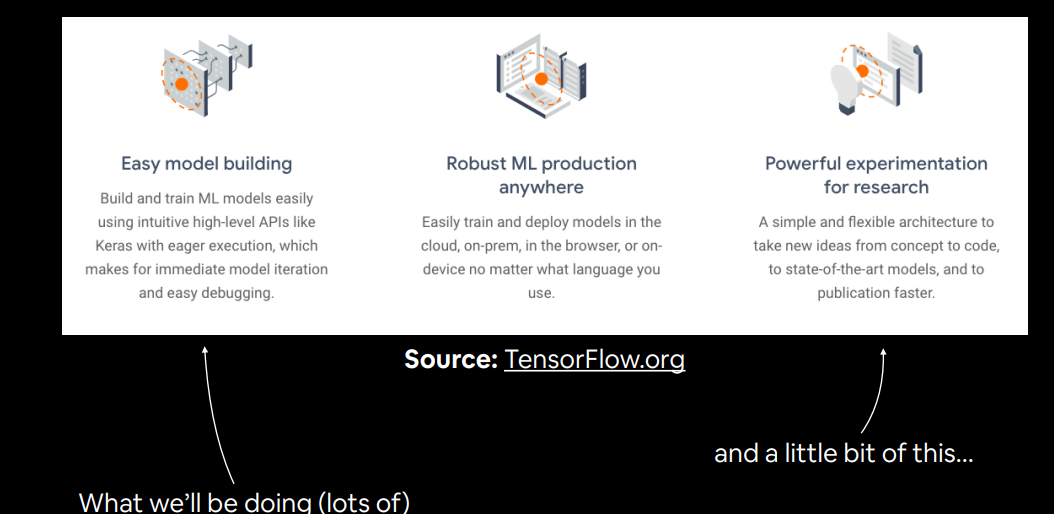


## What we're going to cover

TensorFlow is vast. But the main premise is simple: turn data into numbers (tensors) and build machine learning algorithms to find patterns in them.

In this notebook we cover some of the most fundamental TensorFlow operations, more specificially:
* Introduction to tensors (creating tensors)
* Getting information from tensors (tensor attributes)
* Manipulating tensors (tensor operations)
* Tensors and NumPy
* Using @tf.function (a way to speed up your regular Python functions)
* Using GPUs with TensorFlow
* Exercises to try

Things to note:
* Many of the conventions here will happen automatically behind the scenes (when you build a model) but it's worth knowing so if you see any of these things, you know what's happening.
* For any TensorFlow function you see, it's important to be able to check it out in the documentation, for example, going to the Python API docs for all functions and searching for what you need: https://www.tensorflow.org/api_docs/python/ (don't worry if this seems overwhelming at first, with enough practice, you'll get used to navigating the documentaiton).

## Introduction to Tensors

If you've ever used NumPy, [tensors](https://www.tensorflow.org/guide/tensor) are kind of like NumPy arrays (we'll see more on this later).

For the sake of this notebook and going forward, you can think of a tensor as a multi-dimensional numerical representation (also referred to as n-dimensional, where n can be any number) of something. Where something can be almost anything you can imagine: 
* It could be numbers themselves (using tensors to represent the price of houses). 
* It could be an image (using tensors to represent the pixels of an image).
* It could be text (using tensors to represent words).
* Or it could be some other form of information (or data) you want to represent with numbers.

The main difference between tensors and NumPy arrays (also an n-dimensional array of numbers) is that tensors can be used on [GPUs (graphical processing units)](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) and [TPUs (tensor processing units)](https://en.wikipedia.org/wiki/Tensor_processing_unit). 

The benefit of being able to run on GPUs and TPUs is faster computation, this means, if we wanted to find patterns in the numerical representations of our data, we can generally find them faster using GPUs and TPUs.

Okay, we've been talking enough about tensors, let's see them.

The first thing we'll do is import TensorFlow under the common alias `tf`.

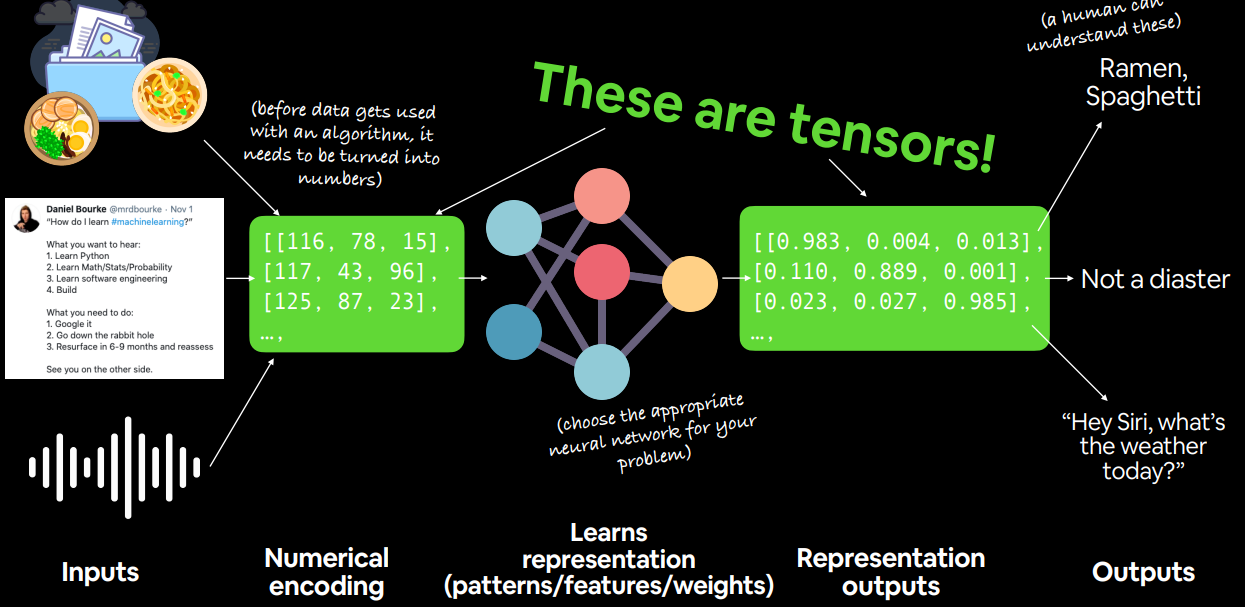

## What we’re going to cover (in the whole course)

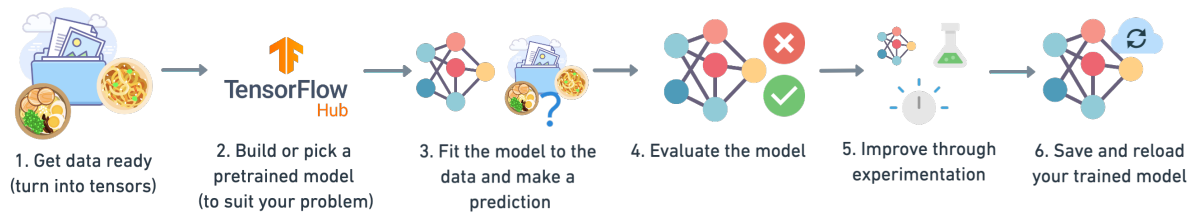

In [1]:
# Import TensorFlow
import tensorflow as tf
print(tf.__version__) # find the version number (should be 2.x+)

2.9.1


### Creating Tensors with `tf.constant()`

As mentioned before, in general, you usually won't create tensors yourself. This is because TensorFlow has modules built-in (such as [`tf.io`](https://www.tensorflow.org/api_docs/python/tf/io) and [`tf.data`](https://www.tensorflow.org/guide/data)) which are able to read your data sources and automatically convert them to tensors and then later on, neural network models will process these for us.

But for now, because we're getting familar with tensors themselves and how to manipulate them, we'll see how we can create them ourselves.

We'll begin by using [`tf.constant()`](https://www.tensorflow.org/api_docs/python/tf/constant).

In [ ]:
# Create a scalar (rank 0 tensor)
scalar = tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

A scalar is known as a rank 0 tensor. Because it has no dimensions (it's just a number).

> 🔑 **Note:** For now, you don't need to know too much about the different ranks of tensors (but we will see more on this later). The important point is knowing tensors can have an unlimited range of dimensions (the exact amount will depend on what data you're representing).

In [ ]:
# Check the number of dimensions of a tensor (ndim stands for number of dimensions)
scalar.ndim

0

In [ ]:
# Create a vector (more than 0 dimensions)
vector = tf.constant([10, 10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
# Check the number of dimensions of our vector tensor
vector.ndim

1

In [ ]:
# Create a matrix (more than 1 dimension)
matrix = tf.constant([[10, 7],
                      [7, 10]])
matrix

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix.ndim

2

By default, TensorFlow creates tensors with either an `int32` or `float32` datatype.

This is known as [32-bit precision](https://en.wikipedia.org/wiki/Precision_(computer_science) (the higher the number, the more precise the number, the more space it takes up on your computer).

In [ ]:
# Create another matrix and define the datatype
another_matrix = tf.constant([[10., 7.],
                              [3., 2.],
                              [8., 9.]], dtype=tf.float16) # specify the datatype with 'dtype'
another_matrix

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  9.]], dtype=float16)>

In [ ]:
# Even though another_matrix contains more numbers, its dimensions stay the same
another_matrix.ndim

2

In [ ]:
# How about a tensor? (more than 2 dimensions, although, all of the above items are also technically tensors)
tensor = tf.constant([[[1, 2, 3],
                       [4, 5, 6]],
                      [[7, 8, 9],
                       [10, 11, 12]],
                      [[13, 14, 15],
                       [16, 17, 18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

This is known as a rank 3 tensor (3-dimensions), however a tensor can have an arbitrary (unlimited) amount of dimensions.

For example, you might turn a series of images into tensors with shape (224, 224, 3, 32), where:
* 224, 224 (the first 2 dimensions) are the height and width of the images in pixels.
* 3 is the number of colour channels of the image (red, green blue).
* 32 is the batch size (the number of images a neural network sees at any one time).

All of the above variables we've created are actually tensors. But you may also hear them referred to as their different names (the ones we gave them):
* **scalar**: a single number.
* **vector**: a number with direction (e.g. wind speed with direction).
* **matrix**: a 2-dimensional array of numbers.
* **tensor**: an n-dimensional arrary of numbers (where n can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector). 

To add to the confusion, the terms matrix and tensor are often used interchangably.

Going forward since we're using TensorFlow, everything we refer to and use will be tensors.

For more on the mathematical difference between scalars, vectors and matrices see the [visual algebra post by Math is Fun](https://www.mathsisfun.com/algebra/scalar-vector-matrix.html).

![difference between scalar, vector, matrix, tensor](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)

### Creating Tensors with `tf.Variable()`

You can also (although you likely rarely will, because often, when working with data, tensors are created for you automatically) create tensors using [`tf.Variable()`](https://www.tensorflow.org/api_docs/python/tf/Variable).

The difference between `tf.Variable()` and `tf.constant()` is tensors created with `tf.constant()` are immutable (can't be changed, can only be used to create a new tensor), where as, tensors created with `tf.Variable()` are mutable (can be changed).

In [ ]:
# Create the same tensor with tf.Variable() and tf.constant()
changeable_tensor = tf.Variable([10, 7])
unchangeable_tensor = tf.constant([10, 7])
changeable_tensor, unchangeable_tensor

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

Now let's try to change one of the elements of the changable tensor.

In [ ]:
# Will error (requires the .assign() method)
changeable_tensor[0] = 7
changeable_tensor

TypeError: ignored

To change an element of a `tf.Variable()` tensor requires the `assign()` method.

In [ ]:
# Won't error
changeable_tensor[0].assign(7)
changeable_tensor

<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([7, 7], dtype=int32)>

Now let's try to change a value in a `tf.constant()` tensor.

In [ ]:
# Will error (can't change tf.constant())
unchangeable_tensor[0].assign(7)
unchangleable_tensor

AttributeError: ignored

Which one should you use? `tf.constant()` or `tf.Variable()`?

It will depend on what your problem requires. However, most of the time, TensorFlow will automatically choose for you (when loading data or modelling data).

### Creating random tensors

Random tensors are tensors of some abitrary size which contain random numbers.

Why would you want to create random tensors? 

This is what neural networks use to intialize their weights (patterns) that they're trying to learn in the data.

For example, the process of a neural network learning often involves taking a random n-dimensional array of numbers and refining them until they represent some kind of pattern (a compressed way to represent the original data).

**How a network learns**
![how a network learns](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-how-a-network-learns.png)
*A network learns by starting with random patterns (1) then going through demonstrative examples of data (2) whilst trying to update its random patterns to represent the examples (3).*

We can create random tensors by using the [`tf.random.Generator`](https://www.tensorflow.org/guide/random_numbers#the_tfrandomgenerator_class) class.

In [ ]:
# Create two random (but the same) tensors
random_1 = tf.random.Generator.from_seed(42) # set the seed for reproducibility
random_1 = random_1.normal(shape=(3, 2)) # create tensor from a normal distribution 
random_2 = tf.random.Generator.from_seed(42)
random_2 = random_2.normal(shape=(3, 2))

# Are they equal?
random_1, random_2, random_1 == random_2

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>)

The random tensors we've made are actually [pseudorandom numbers](https://www.computerhope.com/jargon/p/pseudo-random.htm) (they appear as random, but really aren't).

If we set a seed we'll get the same random numbers (if you've ever used NumPy, this is similar to `np.random.seed(42)`). 

Setting the seed says, "hey, create some random numbers, but flavour them with X" (X is the seed).

What do you think will happen when we change the seed?

In [ ]:
# Create two random (and different) tensors
random_3 = tf.random.Generator.from_seed(42)
random_3 = random_3.normal(shape=(3, 2))
random_4 = tf.random.Generator.from_seed(11)
random_4 = random_4.normal(shape=(3, 2))

# Check the tensors and see if they are equal
random_3, random_4, random_1 == random_3, random_3 == random_4

(<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[-0.7565803 , -0.06854702],
        [ 0.07595026, -1.2573844 ],
        [-0.23193765, -1.8107855 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=float32, numpy=
 array([[ 0.2730574 , -0.29925638],
        [-0.3652325 ,  0.61883307],
        [-1.0130816 ,  0.2829171 ]], dtype=float32)>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[ True,  True],
        [ True,  True],
        [ True,  True]])>,
 <tf.Tensor: shape=(3, 2), dtype=bool, numpy=
 array([[False, False],
        [False, False],
        [False, False]])>)

What if you wanted to shuffle the order of a tensor?

Wait, why would you want to do that?

Let's say you working with 15,000 images of cats and dogs and the first 10,000 images of were of cats and the next 5,000 were of dogs. This order could effect how a neural network learns (it may overfit by learning the order of the data), instead, it might be a good idea to move your data around.

In [ ]:
# Shuffle a tensor (valuable for when you want to shuffle your data)
not_shuffled = tf.constant([[10, 7],
                            [3, 4],
                            [2, 5]])
# Gets different results each time
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 2,  5],
       [ 3,  4]], dtype=int32)>

In [ ]:
# Shuffle in the same order every time using the seed parameter (won't acutally be the same)
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 2,  5],
       [ 3,  4],
       [10,  7]], dtype=int32)>

Wait... why didn't the numbers come out the same?

It's due to rule #4 of the [`tf.random.set_seed()`](https://www.tensorflow.org/api_docs/python/tf/random/set_seed) documentation.

> "4. If both the global and the operation seed are set: Both seeds are used in conjunction to determine the random sequence."

`tf.random.set_seed(42)` sets the global seed, and the `seed` parameter in `tf.random.shuffle(seed=42)` sets the operation seed.

Because, "Operations that rely on a random seed actually derive it from two seeds: the global and operation-level seeds. This sets the global seed."


In [ ]:
# Shuffle in the same order every time

# Set the global random seed
tf.random.set_seed(42)

# Set the operation random seed
tf.random.shuffle(not_shuffled, seed=42)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4],
       [ 2,  5]], dtype=int32)>

In [ ]:
# Set the global random seed
tf.random.set_seed(42) # if you comment this out you'll get different results

# Set the operation random seed
tf.random.shuffle(not_shuffled)

<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
array([[ 3,  4],
       [ 2,  5],
       [10,  7]], dtype=int32)>

### Other ways to make tensors

Though you might rarely use these (remember, many tensor operations are done behind the scenes for you), you can use [`tf.ones()`](https://www.tensorflow.org/api_docs/python/tf/ones) to create a tensor of all ones and [`tf.zeros()`](https://www.tensorflow.org/api_docs/python/tf/zeros) to create a tensor of all zeros.

In [ ]:
# Make a tensor of all ones
tf.ones(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[1., 1.],
       [1., 1.],
       [1., 1.]], dtype=float32)>

In [ ]:
# Make a tensor of all zeros
tf.zeros(shape=(3, 2))

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)>

You can also turn NumPy arrays in into tensors.

Remember, the main difference between tensors and NumPy arrays is that tensors can be run on GPUs.

> 🔑 **Note:** A matrix or tensor is typically represented by a capital letter (e.g. `X` or `A`) where as a vector is typically represented by a lowercase letter (e.g. `y` or `b`).

In [ ]:
import numpy as np
numpy_A = np.arange(1, 25, dtype=np.int32) # create a NumPy array between 1 and 25
A = tf.constant(numpy_A,  
                shape=[2, 4, 3]) # note: the shape total (2*4*3) has to match the number of elements in the array
numpy_A, A

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24], dtype=int32),
 <tf.Tensor: shape=(2, 4, 3), dtype=int32, numpy=
 array([[[ 1,  2,  3],
         [ 4,  5,  6],
         [ 7,  8,  9],
         [10, 11, 12]],
 
        [[13, 14, 15],
         [16, 17, 18],
         [19, 20, 21],
         [22, 23, 24]]], dtype=int32)>)

## Getting information from tensors (shape, rank, size)

There will be times when you'll want to get different pieces of information from your tensors, in particuluar, you should know the following tensor vocabulary:
* **Shape:** The length (number of elements) of each of the dimensions of a tensor.
* **Rank:** The number of tensor dimensions. A scalar has rank 0, a vector has rank 1, a matrix is rank 2, a tensor has rank n.
* **Axis** or **Dimension:** A particular dimension of a tensor.
* **Size:** The total number of items in the tensor.

You'll use these especially when you're trying to line up the shapes of your data to the shapes of your model. For example, making sure the shape of your image tensors are the same shape as your models input layer.

We've already seen one of these before using the `ndim` attribute. Let's see the rest.

In [ ]:
# Create a rank 4 tensor (4 dimensions)
rank_4_tensor = tf.zeros([2, 3, 4, 5])
rank_4_tensor

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
rank_4_tensor.shape, rank_4_tensor.ndim, tf.size(rank_4_tensor)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

In [ ]:
# Get various attributes of tensor
print("Datatype of every element:", rank_4_tensor.dtype)
print("Number of dimensions (rank):", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (2*3*4*5):", tf.size(rank_4_tensor).numpy()) # .numpy() converts to NumPy array

Datatype of every element: <dtype: 'float32'>
Number of dimensions (rank): 4
Shape of tensor: (2, 3, 4, 5)
Elements along axis 0 of tensor: 2
Elements along last axis of tensor: 5
Total number of elements (2*3*4*5): 120


You can also index tensors just like Python lists.

In [ ]:
# Get the first 2 items of each dimension
rank_4_tensor[:2, :2, :2, :2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

In [ ]:
# Get the dimension from each index except for the final one
rank_4_tensor[:1, :1, :1, :]

<tf.Tensor: shape=(1, 1, 1, 5), dtype=float32, numpy=array([[[[0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
# Create a rank 2 tensor (2 dimensions)
rank_2_tensor = tf.constant([[10, 7],
                             [3, 4]])

# Get the last item of each row
rank_2_tensor[:, -1]

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([7, 4], dtype=int32)>

You can also add dimensions to your tensor whilst keeping the same information present using `tf.newaxis`. 

In [ ]:
# Add an extra dimension (to the end)
rank_3_tensor = rank_2_tensor[..., tf.newaxis] # in Python "..." means "all dimensions prior to"
rank_2_tensor, rank_3_tensor # shape (2, 2), shape (2, 2, 1)

(<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
 array([[10,  7],
        [ 3,  4]], dtype=int32)>,
 <tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
 array([[[10],
         [ 7]],
 
        [[ 3],
         [ 4]]], dtype=int32)>)

You can achieve the same using [`tf.expand_dims()`](https://www.tensorflow.org/api_docs/python/tf/expand_dims).

In [ ]:
tf.expand_dims(rank_2_tensor, axis=-1) # "-1" means last axis

<tf.Tensor: shape=(2, 2, 1), dtype=int32, numpy=
array([[[10],
        [ 7]],

       [[ 3],
        [ 4]]], dtype=int32)>

## Manipulating tensors (tensor operations)

Finding patterns in tensors (numberical representation of data) requires manipulating them.

Again, when building models in TensorFlow, much of this pattern discovery is done for you.

### Basic operations

You can perform many of the basic mathematical operations directly on tensors using Pyhton operators such as, `+`, `-`, `*`.

In [ ]:
# You can add values to a tensor using the addition operator
tensor = tf.constant([[10, 7], [3, 4]])
tensor + 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[20, 17],
       [13, 14]], dtype=int32)>

Since we used `tf.constant()`, the original tensor is unchanged (the addition gets done on a copy).

In [ ]:
# Original tensor unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

Other operators also work.

In [ ]:
# Multiplication (known as element-wise multiplication)
tensor * 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# Subtraction
tensor - 10

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 0, -3],
       [-7, -6]], dtype=int32)>

You can also use the equivalent TensorFlow function. Using the TensorFlow function (where possible) has the advantage of being sped up later down the line when running as part of a [TensorFlow graph](https://www.tensorflow.org/tensorboard/graphs).

In [ ]:
# Use the tensorflow function equivalent of the '*' (multiply) operator
tf.multiply(tensor, 10)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[100,  70],
       [ 30,  40]], dtype=int32)>

In [ ]:
# The original tensor is still unchanged
tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 3,  4]], dtype=int32)>

### Matrix mutliplication

One of the most common operations in machine learning algorithms is [matrix multiplication](https://www.mathsisfun.com/algebra/matrix-multiplying.html).

TensorFlow implements this matrix multiplication functionality in the [`tf.matmul()`](https://www.tensorflow.org/api_docs/python/tf/linalg/matmul) method.

The main two rules for matrix multiplication to remember are:
1. The inner dimensions must match:
  * `(3, 5) @ (3, 5)` won't work
  * `(5, 3) @ (3, 5)` will work
  * `(3, 5) @ (5, 3)` will work
2. The resulting matrix has the shape of the outer dimensions:
 * `(5, 3) @ (3, 5)` -> `(5, 5)`
 * `(3, 5) @ (5, 3)` -> `(3, 3)`

> 🔑 **Note:** '`@`' in Python is the symbol for matrix multiplication.

In [ ]:
# Matrix multiplication in TensorFlow
print(tensor)
tf.matmul(tensor, tensor)

tf.Tensor(
[[10  7]
 [ 3  4]], shape=(2, 2), dtype=int32)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

In [ ]:
# Matrix multiplication with Python operator '@'
tensor @ tensor

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[121,  98],
       [ 42,  37]], dtype=int32)>

Both of these examples work because our `tensor` variable is of shape (2, 2).

What if we created some tensors which had mismatched shapes?

In [ ]:
# Create (3, 2) tensor
X = tf.constant([[1, 2],
                 [3, 4],
                 [5, 6]])

# Create another (3, 2) tensor
Y = tf.constant([[7, 8],
                 [9, 10],
                 [11, 12]])
X, Y

(<tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[1, 2],
        [3, 4],
        [5, 6]], dtype=int32)>, <tf.Tensor: shape=(3, 2), dtype=int32, numpy=
 array([[ 7,  8],
        [ 9, 10],
        [11, 12]], dtype=int32)>)

In [ ]:
# Try to matrix multiply them (will error)
X @ Y

InvalidArgumentError: ignored

Trying to matrix multiply two tensors with the shape `(3, 2)` errors because the inner dimensions don't match.

We need to either:
* Reshape X to `(2, 3)` so it's `(2, 3) @ (3, 2)`.
* Reshape Y to `(3, 2)` so it's `(3, 2) @ (2, 3)`.

We can do this with either:
* [`tf.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape) - allows us to reshape a tensor into a defined shape.
* [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose) - switches the dimensions of a given tensor.

![lining up dimensions for dot products](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-lining-up-dot-products.png)

Let's try `tf.reshape()` first.

In [ ]:
# Example of reshape (3, 2) -> (2, 3)
tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[ 7,  8,  9],
       [10, 11, 12]], dtype=int32)>

In [ ]:
# Try matrix multiplication with reshaped Y
X @ tf.reshape(Y, shape=(2, 3))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

It worked, let's try the same with a reshaped `X`, except this time we'll use [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose) and `tf.matmul()`.

In [ ]:
# Example of transpose (3, 2) -> (2, 3)
tf.transpose(X)

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 5],
       [2, 4, 6]], dtype=int32)>

In [ ]:
# Try matrix multiplication 
tf.matmul(tf.transpose(X), Y)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

In [ ]:
# You can achieve the same result with parameters
tf.matmul(a=X, b=Y, transpose_a=True, transpose_b=False)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

Notice the difference in the resulting shapes when tranposing `X` or reshaping `Y`.

This is because of the 2nd rule mentioned above:
 * `(3, 2) @ (2, 3)` -> `(3, 3)` done with `X @ tf.reshape(Y, shape=(2, 3))` 
 * `(2, 3) @ (3, 2)` -> `(2, 2)` done with `tf.matmul(tf.transpose(X), Y)`

This kind of data manipulation is a reminder: you'll spend a lot of your time in machine learning and working with neural networks reshaping data (in the form of tensors) to prepare it to be used with various operations (such as feeding it to a model).

### The dot product

Multiplying matrices by eachother is also referred to as the dot product.

You can perform the `tf.matmul()` operation using [`tf.tensordot()`](https://www.tensorflow.org/api_docs/python/tf/tensordot). 

In [ ]:
# Perform the dot product on X and Y (requires X to be transposed)
tf.tensordot(tf.transpose(X), Y, axes=1)

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 89,  98],
       [116, 128]], dtype=int32)>

You might notice that although using both `reshape` and `tranpose` work, you get different results when using each.

Let's see an example, first with `tf.transpose()` then with `tf.reshape()`.

In [ ]:
# Perform matrix multiplication between X and Y (transposed)
tf.matmul(X, tf.transpose(Y))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 23,  29,  35],
       [ 53,  67,  81],
       [ 83, 105, 127]], dtype=int32)>

In [ ]:
# Perform matrix multiplication between X and Y (reshaped)
tf.matmul(X, tf.reshape(Y, (2, 3)))

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 27,  30,  33],
       [ 61,  68,  75],
       [ 95, 106, 117]], dtype=int32)>

Hmm... they result in different values.

Which is strange because when dealing with `Y` (a `(3x2)` matrix), reshaping to `(2, 3)` and tranposing it result in the same shape.

In [ ]:
# Check shapes of Y, reshaped Y and tranposed Y
Y.shape, tf.reshape(Y, (2, 3)).shape, tf.transpose(Y).shape

(TensorShape([3, 2]), TensorShape([2, 3]), TensorShape([2, 3]))

But calling `tf.reshape()` and `tf.transpose()` on `Y` don't necessarily result in the same values.

In [ ]:
# Check values of Y, reshape Y and tranposed Y
print("Normal Y:")
print(Y, "\n") # "\n" for newline

print("Y reshaped to (2, 3):")
print(tf.reshape(Y, (2, 3)), "\n")

print("Y transposed:")
print(tf.transpose(Y))

Normal Y:
tf.Tensor(
[[ 7  8]
 [ 9 10]
 [11 12]], shape=(3, 2), dtype=int32) 

Y reshaped to (2, 3):
tf.Tensor(
[[ 7  8  9]
 [10 11 12]], shape=(2, 3), dtype=int32) 

Y transposed:
tf.Tensor(
[[ 7  9 11]
 [ 8 10 12]], shape=(2, 3), dtype=int32)


As you can see, the outputs of `tf.reshape()` and `tf.transpose()` when called on `Y`, even though they have the same shape, are different.

This can be explained by the default behaviour of each method:
* [`tf.reshape()`](https://www.tensorflow.org/api_docs/python/tf/reshape) - change the shape of the given tensor (first) and then insert values in order they appear (in our case, 7, 8, 9, 10, 11, 12).
* [`tf.transpose()`](https://www.tensorflow.org/api_docs/python/tf/transpose) - swap the order of the axes, by default the last axis becomes the first, however the order can be changed using the [`perm` parameter](https://www.tensorflow.org/api_docs/python/tf/transpose).

So which should you use?

Again, most of the time these operations (when they need to be run, such as during the training a neural network, will be implemented for you).

But generally, whenever performing a matrix multiplication and the shapes of two matrices don't line up, you will transpose (not reshape) one of them in order to line them up.

### Matrix multiplication tidbits
* If we transposed `Y`, it would be represented as $\mathbf{Y}^\mathsf{T}$ (note the capital T for tranpose).
* Get an illustrative view of matrix multiplication [by Math is Fun](https://www.mathsisfun.com/algebra/matrix-multiplying.html).
* Try a hands-on demo of matrix multiplcation: http://matrixmultiplication.xyz/ (shown below).

![visual demo of matrix multiplication](https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/00-matrix-multiply-crop.gif)

### Changing the datatype of a tensor

Sometimes you'll want to alter the default datatype of your tensor. 

This is common when you want to compute using less precision (e.g. 16-bit floating point numbers vs. 32-bit floating point numbers). 

Computing with less precision is useful on devices with less computing capacity such as mobile devices (because the less bits, the less space the computations require).

You can change the datatype of a tensor using [`tf.cast()`](https://www.tensorflow.org/api_docs/python/tf/cast).

In [ ]:
# Create a new tensor with default datatype (float32)
B = tf.constant([1.7, 7.4])

# Create a new tensor with default datatype (int32)
C = tf.constant([1, 7])
B, C

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1.7, 7.4], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([1, 7], dtype=int32)>)

In [ ]:
# Change from float32 to float16 (reduced precision)
B = tf.cast(B, dtype=tf.float16)
B

<tf.Tensor: shape=(2,), dtype=float16, numpy=array([1.7, 7.4], dtype=float16)>

In [ ]:
# Change from int32 to float32
C = tf.cast(C, dtype=tf.float32)
C

<tf.Tensor: shape=(2,), dtype=float32, numpy=array([1., 7.], dtype=float32)>

### Getting the absolute value
Sometimes you'll want the absolute values (all values are positive) of elements in your tensors.

To do so, you can use [`tf.abs()`](https://www.tensorflow.org/api_docs/python/tf/math/abs).

In [ ]:
# Create tensor with negative values
D = tf.constant([-7, -10])
D

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ -7, -10], dtype=int32)>

In [ ]:
# Get the absolute values
tf.abs(D)

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([ 7, 10], dtype=int32)>

### Finding the min, max, mean, sum (aggregation)

You can quickly aggregate (perform a calculation on a whole tensor) tensors to find things like the minimum value, maximum value, mean and sum of all the elements.

To do so, aggregation methods typically have the syntax `reduce()_[action]`, such as:
* [`tf.reduce_min()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_min) - find the minimum value in a tensor.
* [`tf.reduce_max()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_max) - find the maximum value in a tensor (helpful for when you want to find the highest prediction probability).
* [`tf.reduce_mean()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_mean) - find the mean of all elements in a tensor.
* [`tf.reduce_sum()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_sum) - find the sum of all elements in a tensor.
* **Note:** typically, each of these is under the `math` module, e.g. `tf.math.reduce_min()` but you can use the alias `tf.reduce_min()`.

Let's see them in action.

In [ ]:
# Create a tensor with 50 random values between 0 and 100
E = tf.constant(np.random.randint(low=0, high=100, size=50))
E

<tf.Tensor: shape=(50,), dtype=int64, numpy=
array([79, 33, 64, 90, 16,  3, 70, 51, 27, 54, 71, 65,  4,  8, 78, 84, 11,
       23, 15,  2, 55, 74, 26, 58,  9, 74, 33, 49, 48,  4, 30, 41, 69, 17,
       39, 37,  3, 63, 13, 37, 72, 80, 93, 29, 61, 82, 85, 40, 79, 14])>

In [ ]:
# Find the minimum
tf.reduce_min(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [ ]:
# Find the maximum
tf.reduce_max(E)

<tf.Tensor: shape=(), dtype=int64, numpy=93>

In [ ]:
# Find the mean
tf.reduce_mean(E)

<tf.Tensor: shape=(), dtype=int64, numpy=45>

In [ ]:
# Find the sum
tf.reduce_sum(E)

<tf.Tensor: shape=(), dtype=int64, numpy=2262>

You can also find the standard deviation ([`tf.reduce_std()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_std)) and variance ([`tf.reduce_variance()`](https://www.tensorflow.org/api_docs/python/tf/math/reduce_variance)) of elements in a tensor using similar methods.

### Finding the positional maximum and minimum

How about finding the position a tensor where the maximum value occurs?

This is helpful when you want to line up your labels (say `['Green', 'Blue', 'Red']`) with your prediction probabilities tensor (e.g. `[0.98, 0.01, 0.01]`).

In this case, the predicted label (the one with the highest prediction probability) would be `'Green'`.

You can do the same for the minimum (if required) with the following:
* [`tf.argmax()`](https://www.tensorflow.org/api_docs/python/tf/math/argmax) - find the position of the maximum element in a given tensor.
* [`tf.argmin()`](https://www.tensorflow.org/api_docs/python/tf/math/argmin) - find the position of the minimum element in a given tensor.

In [ ]:
# Create a tensor with 50 values between 0 and 1
F = tf.constant(np.random.random(50))
F

<tf.Tensor: shape=(50,), dtype=float64, numpy=
array([0.55725069, 0.66589953, 0.51717871, 0.23663905, 0.03861408,
       0.25753377, 0.58184723, 0.05496164, 0.97498269, 0.52503693,
       0.68152575, 0.8151567 , 0.25854921, 0.15479351, 0.43657365,
       0.34710353, 0.18739747, 0.7859743 , 0.11497802, 0.68242342,
       0.74991327, 0.16043629, 0.5636553 , 0.4110329 , 0.62245869,
       0.58129871, 0.44792704, 0.91472587, 0.76207828, 0.36502321,
       0.96601855, 0.03094982, 0.53464709, 0.73241468, 0.0856144 ,
       0.22923332, 0.66802859, 0.68604535, 0.53128266, 0.48685057,
       0.53320669, 0.38020824, 0.81706951, 0.33855374, 0.94007405,
       0.05419892, 0.10267899, 0.6020753 , 0.78038818, 0.87655176])>

In [ ]:
# Find the maximum element position of F
tf.argmax(F)

<tf.Tensor: shape=(), dtype=int64, numpy=8>

In [ ]:
# Find the minimum element position of F
tf.argmin(F)

<tf.Tensor: shape=(), dtype=int64, numpy=31>

In [ ]:
# Find the maximum element position of F
print(f"The maximum value of F is at position: {tf.argmax(F).numpy()}") 
print(f"The maximum value of F is: {tf.reduce_max(F).numpy()}") 
print(f"Using tf.argmax() to index F, the maximum value of F is: {F[tf.argmax(F)].numpy()}")
print(f"Are the two max values the same (they should be)? {F[tf.argmax(F)].numpy() == tf.reduce_max(F).numpy()}")

The maximum value of F is at position: 8
The maximum value of F is: 0.9749826885110175
Using tf.argmax() to index F, the maximum value of F is: 0.9749826885110175
Are the two max values the same (they should be)? True


### Squeezing a tensor (removing all single dimensions)

If you need to remove single-dimensions from a tensor (dimensions with size 1), you can use `tf.squeeze()`.

* [`tf.squeeze()`](https://www.tensorflow.org/api_docs/python/tf/squeeze) - remove all dimensions of 1 from a tensor.


In [ ]:
# Create a rank 5 (5 dimensions) tensor of 50 numbers between 0 and 100
G = tf.constant(np.random.randint(0, 100, 50), shape=(1, 1, 1, 1, 50))
G.shape, G.ndim

(TensorShape([1, 1, 1, 1, 50]), 5)

In [ ]:
# Squeeze tensor G (remove all 1 dimensions)
G_squeezed = tf.squeeze(G)
G_squeezed.shape, G_squeezed.ndim

(TensorShape([50]), 1)

### One-hot encoding

If you have a tensor of indicies and would like to one-hot encode it, you can use [`tf.one_hot()`](https://www.tensorflow.org/api_docs/python/tf/one_hot).

You should also specify the `depth` parameter (the level which you want to one-hot encode to).

In [ ]:
# Create a list of indices
some_list = [0, 1, 2, 3]

# One hot encode them
tf.one_hot(some_list, depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

You can also specify values for `on_value` and `off_value` instead of the default `0` and `1`.

In [ ]:
# Specify custom values for on and off encoding
tf.one_hot(some_list, depth=4, on_value="We're live!", off_value="Offline")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b"We're live!", b'Offline', b'Offline', b'Offline'],
       [b'Offline', b"We're live!", b'Offline', b'Offline'],
       [b'Offline', b'Offline', b"We're live!", b'Offline'],
       [b'Offline', b'Offline', b'Offline', b"We're live!"]], dtype=object)>

### Squaring, log, square root

Many other common mathematical operations you'd like to perform at some stage, probably exist.

Let's take a look at:
* [`tf.square()`](https://www.tensorflow.org/api_docs/python/tf/math/square) - get the square of every value in a tensor. 
* [`tf.sqrt()`](https://www.tensorflow.org/api_docs/python/tf/math/sqrt) - get the squareroot of every value in a tensor (**note:** the elements need to be floats or this will error).
* [`tf.math.log()`](https://www.tensorflow.org/api_docs/python/tf/math/log) - get the natural log of every value in a tensor (elements need to floats).

In [ ]:
# Create a new tensor
H = tf.constant(np.arange(1, 10))
H

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [ ]:
# Square it
tf.square(H)

<tf.Tensor: shape=(9,), dtype=int64, numpy=array([ 1,  4,  9, 16, 25, 36, 49, 64, 81])>

In [ ]:
# Find the squareroot (will error), needs to be non-integer
tf.sqrt(H)

InvalidArgumentError: ignored

In [ ]:
# Change H to float32
H = tf.cast(H, dtype=tf.float32)
H

<tf.Tensor: shape=(9,), dtype=float32, numpy=array([1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>

In [ ]:
# Find the square root
tf.sqrt(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([1.       , 1.4142135, 1.7320508, 2.       , 2.236068 , 2.4494898,
       2.6457512, 2.828427 , 3.       ], dtype=float32)>

In [ ]:
# Find the log (input also needs to be float)
tf.math.log(H)

<tf.Tensor: shape=(9,), dtype=float32, numpy=
array([0.       , 0.6931472, 1.0986123, 1.3862944, 1.609438 , 1.7917595,
       1.9459102, 2.0794415, 2.1972246], dtype=float32)>

### Manipulating `tf.Variable` tensors

Tensors created with `tf.Variable()` can be changed in place using methods such as:

* [`.assign()`](https://www.tensorflow.org/api_docs/python/tf/Variable#assign) - assign a different value to a particular index of a variable tensor.
* [`.add_assign()`](https://www.tensorflow.org/api_docs/python/tf/Variable#assign_add) - add to an existing value and reassign it at a particular index of a variable tensor.


In [ ]:
# Create a variable tensor
I = tf.Variable(np.arange(0, 5))
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([0, 1, 2, 3, 4])>

In [ ]:
# Assign the final value a new value of 50
I.assign([0, 1, 2, 3, 50])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [ ]:
# The change happens in place (the last value is now 50, not 4)
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([ 0,  1,  2,  3, 50])>

In [ ]:
# Add 10 to every element in I
I.assign_add([10, 10, 10, 10, 10])

<tf.Variable 'UnreadVariable' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

In [ ]:
# Again, the change happens in place
I

<tf.Variable 'Variable:0' shape=(5,) dtype=int64, numpy=array([10, 11, 12, 13, 60])>

## Tensors and NumPy

We've seen some examples of tensors interact with NumPy arrays, such as, using NumPy arrays to create tensors. 

Tensors can also be converted to NumPy arrays using:

* `np.array()` - pass a tensor to convert to an ndarray (NumPy's main datatype).
* `tensor.numpy()` - call on a tensor to convert to an ndarray.

Doing this is helpful as it makes tensors iterable as well as allows us to use any of NumPy's methods on them.

In [ ]:
# Create a tensor from a NumPy array
J = tf.constant(np.array([3., 7., 10.]))
J

<tf.Tensor: shape=(3,), dtype=float64, numpy=array([ 3.,  7., 10.])>

In [ ]:
# Convert tensor J to NumPy with np.array()
np.array(J), type(np.array(J))

(array([ 3.,  7., 10.]), numpy.ndarray)

In [ ]:
# Convert tensor J to NumPy with .numpy()
J.numpy(), type(J.numpy())

(array([ 3.,  7., 10.]), numpy.ndarray)

By default tensors have `dtype=float32`, where as NumPy arrays have `dtype=float64`.

This is because neural networks (which are usually built with TensorFlow) can generally work very well with less precision (32-bit rather than 64-bit).

In [ ]:
# Create a tensor from NumPy and from an array
numpy_J = tf.constant(np.array([3., 7., 10.])) # will be float64 (due to NumPy)
tensor_J = tf.constant([3., 7., 10.]) # will be float32 (due to being TensorFlow default)
numpy_J.dtype, tensor_J.dtype

(tf.float64, tf.float32)

## Using `@tf.function`

In your TensorFlow adventures, you might come across Python functions which have the decorator [`@tf.function`](https://www.tensorflow.org/api_docs/python/tf/function).

If you aren't sure what Python decorators do, [read RealPython's guide on them](https://realpython.com/primer-on-python-decorators/).

But in short, decorators modify a function in one way or another.

In the `@tf.function` decorator case, it turns a Python function into a callable TensorFlow graph. Which is a fancy way of saying, if you've written your own Python function, and you decorate it with `@tf.function`, when you export your code (to potentially run on another device), TensorFlow will attempt to convert it into a fast(er) version of itself (by making it part of a computation graph).

For more on this, read the [Better performnace with tf.function](https://www.tensorflow.org/guide/function) guide.

In [ ]:
# Create a simple function
def function(x, y):
  return x ** 2 + y

x = tf.constant(np.arange(0, 10))
y = tf.constant(np.arange(10, 20))
function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

In [ ]:
# Create the same function and decorate it with tf.function
@tf.function
def tf_function(x, y):
  return x ** 2 + y

tf_function(x, y)

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([ 10,  12,  16,  22,  30,  40,  52,  66,  82, 100])>

If you noticed no difference between the above two functions (the decorated one and the non-decorated one) you'd be right.

Much of the difference happens behind the scenes. One of the main ones being potential code speed-ups where possible.

## Finding access to GPUs

We've mentioned GPUs plenty of times throughout this notebook.

So how do you check if you've got one available?

You can check if you've got access to a GPU using [`tf.config.list_physical_devices()`](https://www.tensorflow.org/guide/gpu).

In [ ]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


If the above outputs an empty array (or nothing), it means you don't have access to a GPU (or at least TensorFlow can't find it).

If you're running in Google Colab, you can access a GPU by going to *Runtime -> Change Runtime Type -> Select GPU* (**note:** after doing this your notebook will restart and any variables you've saved will be lost).

Once you've changed your runtime type, run the cell below.

In [1]:
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


If you've got access to a GPU, the cell above should output something like:

`[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]`

You can also find information about your GPU using `!nvidia-smi`.

In [2]:
!nvidia-smi

Wed Aug 10 04:32:49 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.73.05    Driver Version: 510.73.05    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0  On |                  N/A |
| 33%   42C    P8    15W / 170W |    308MiB /  4096MiB |      6%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

> 🔑 **Note:** If you have access to a GPU, TensorFlow will automatically use it whenever possible.

## 🛠 Exercises

1. Create a vector, scalar, matrix and tensor with values of your choosing using `tf.constant()`.
2. Find the shape, rank and size of the tensors you created in 1.
3. Create two tensors containing random values between 0 and 1 with shape `[5, 300]`.
4. Multiply the two tensors you created in 3 using matrix multiplication.
5. Multiply the two tensors you created in 3 using dot product.
6. Create a tensor with random values between 0 and 1 with shape `[224, 224, 3]`.
7. Find the min and max values of the tensor you created in 6.
8. Created a tensor with random values of shape `[1, 224, 224, 3]` then squeeze it to change the shape to `[224, 224, 3]`.
9. Create a tensor with shape `[10]` using your own choice of values, then find the index which has the maximum value.
10. One-hot encode the tensor you created in 9.

## 📖 Extra-curriculum

* Read through the [list of TensorFlow Python APIs](https://www.tensorflow.org/api_docs/python/), pick one we haven't gone through in this notebook, reverse engineer it (write out the documentation code for yourself) and figure out what it does.
* Try to create a series of tensor functions to calculate your most recent grocery bill (it's okay if you don't use the names of the items, just the price in numerical form).
  * How would you calculate your grocery bill for the month and for the year using tensors?
* Go through the [TensorFlow 2.x quick start for beginners](https://www.tensorflow.org/tutorials/quickstart/beginner) tutorial (be sure to type out all of the code yourself, even if you don't understand it).
  * Are there any functions we used in here that match what's used in there? Which are the same? Which haven't you seen before?
* Watch the video ["What's a tensor?"](https://www.youtube.com/watch?v=f5liqUk0ZTw) - a great visual introduction to many of the concepts we've covered in this notebook.